# Heart Failure disease Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information :-
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
# Downloading Nessassary Libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np

# VIsualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

###

## Data Preprocessing

### Loading Dataset

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Counting, number of rows and columns
print("rows : ",df.shape[0])
print("columns : ",df.shape[1])

rows :  918
columns :  12


###

### Handling Missing Values

In [7]:
# Counting Missing/Null Values 
Missing_Value = df.isnull().sum()
print(Missing_Value)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
# Counting Duplicate Values
Duplicate_Value = df.duplicated().sum()
print(f'duplicated rows are = {Duplicate_Value}')

duplicated rows are = 0


###

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.shape

(918, 12)

###

### Data Cleaning for Sex

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [13]:
df['Gender_Male'] = df.apply(lambda row: 1 if (row["Sex"] == "M") else 0, axis=1)

In [14]:
df['Gender_Female'] = df.apply(lambda row: 1 if (row["Sex"] == "F") else 0, axis=1)

In [15]:
df.drop(columns=['Sex'], inplace=True)

In [16]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_Male,Gender_Female
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0


###

### Data Cleaning for ChestPainType

In [17]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_Male,Gender_Female
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0


In [18]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [19]:
df.drop(columns=['ChestPainType'], inplace=True)

In [20]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_Male,Gender_Female
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,0
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,1
2,37,130,283,0,ST,98,N,0.0,Up,0,1,0
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,1
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,0


###

### Data Cleaning for RestingECG

In [21]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_Male,Gender_Female
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,0
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,1
2,37,130,283,0,ST,98,N,0.0,Up,0,1,0
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,1
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,0


In [22]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [23]:
df['RestingECG_Normal'] = df.apply(lambda row: 1 if (row["RestingECG"] == "Normal") else 0, axis=1)

In [24]:
df['RestingECG_ST'] = df.apply(lambda row: 1 if (row["RestingECG"] == "ST") else 0, axis=1)

In [25]:
df['RestingECG_LVH'] = df.apply(lambda row: 1 if (row["RestingECG"] == "lvh") else 0, axis=1)

In [26]:
df.drop(columns=['RestingECG'], inplace=True)

In [27]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_Male,Gender_Female,RestingECG_Normal,RestingECG_ST,RestingECG_LVH
0,40,140,289,0,172,N,0.0,Up,0,1,0,1,0,0
1,49,160,180,0,156,N,1.0,Flat,1,0,1,1,0,0
2,37,130,283,0,98,N,0.0,Up,0,1,0,0,1,0
3,48,138,214,0,108,Y,1.5,Flat,1,0,1,1,0,0
4,54,150,195,0,122,N,0.0,Up,0,1,0,1,0,0


###

### Data Cleaning for ExerciseAngina

In [28]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_Male,Gender_Female,RestingECG_Normal,RestingECG_ST,RestingECG_LVH
0,40,140,289,0,172,N,0.0,Up,0,1,0,1,0,0
1,49,160,180,0,156,N,1.0,Flat,1,0,1,1,0,0
2,37,130,283,0,98,N,0.0,Up,0,1,0,0,1,0
3,48,138,214,0,108,Y,1.5,Flat,1,0,1,1,0,0
4,54,150,195,0,122,N,0.0,Up,0,1,0,1,0,0


In [29]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [30]:
df['ExerciseAngina'] = df.apply(lambda row: 1 if (row["ExerciseAngina"] == "Y") else 0, axis=1)

In [31]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_Male,Gender_Female,RestingECG_Normal,RestingECG_ST,RestingECG_LVH
0,40,140,289,0,172,0,0.0,Up,0,1,0,1,0,0
1,49,160,180,0,156,0,1.0,Flat,1,0,1,1,0,0
2,37,130,283,0,98,0,0.0,Up,0,1,0,0,1,0
3,48,138,214,0,108,1,1.5,Flat,1,0,1,1,0,0
4,54,150,195,0,122,0,0.0,Up,0,1,0,1,0,0


###

### Data Cleaning for ST_Slope

In [32]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender_Male,Gender_Female,RestingECG_Normal,RestingECG_ST,RestingECG_LVH
0,40,140,289,0,172,0,0.0,Up,0,1,0,1,0,0
1,49,160,180,0,156,0,1.0,Flat,1,0,1,1,0,0
2,37,130,283,0,98,0,0.0,Up,0,1,0,0,1,0
3,48,138,214,0,108,1,1.5,Flat,1,0,1,1,0,0
4,54,150,195,0,122,0,0.0,Up,0,1,0,1,0,0


In [33]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [34]:
df['ST_Slope_Up'] = df.apply(lambda row: 1 if (row["ST_Slope"] == "Up") else 0, axis=1)

In [35]:
df['ST_Slope_Flat'] = df.apply(lambda row: 1 if (row["ST_Slope"] == "Flat") else 0, axis=1)

In [36]:
df['ST_Slope_Down'] = df.apply(lambda row: 1 if (row["ST_Slope"] == "Down") else 0, axis=1)

In [37]:
df.drop(columns=['ST_Slope'], inplace=True)

In [38]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Gender_Male,Gender_Female,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,140,289,0,172,0,0.0,0,1,0,1,0,0,1,0,0
1,49,160,180,0,156,0,1.0,1,0,1,1,0,0,0,1,0
2,37,130,283,0,98,0,0.0,0,1,0,0,1,0,1,0,0
3,48,138,214,0,108,1,1.5,1,0,1,1,0,0,0,1,0
4,54,150,195,0,122,0,0.0,0,1,0,1,0,0,1,0,0


###

## Independent And dependent features

In [39]:
X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [40]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Gender_Male,Gender_Female,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,140,289,0,172,0,0.0,1,0,1,0,0,1,0,0
1,49,160,180,0,156,0,1.0,0,1,1,0,0,0,1,0
2,37,130,283,0,98,0,0.0,1,0,0,1,0,1,0,0
3,48,138,214,0,108,1,1.5,0,1,1,0,0,0,1,0
4,54,150,195,0,122,0,0.0,1,0,1,0,0,1,0,0


In [41]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

###

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
X_train.shape,X_test.shape

((642, 15), (276, 15))

In [44]:
y_train.shape,y_test.shape

((642,), (276,))

###

## Check for multicollinearity

<Axes: >

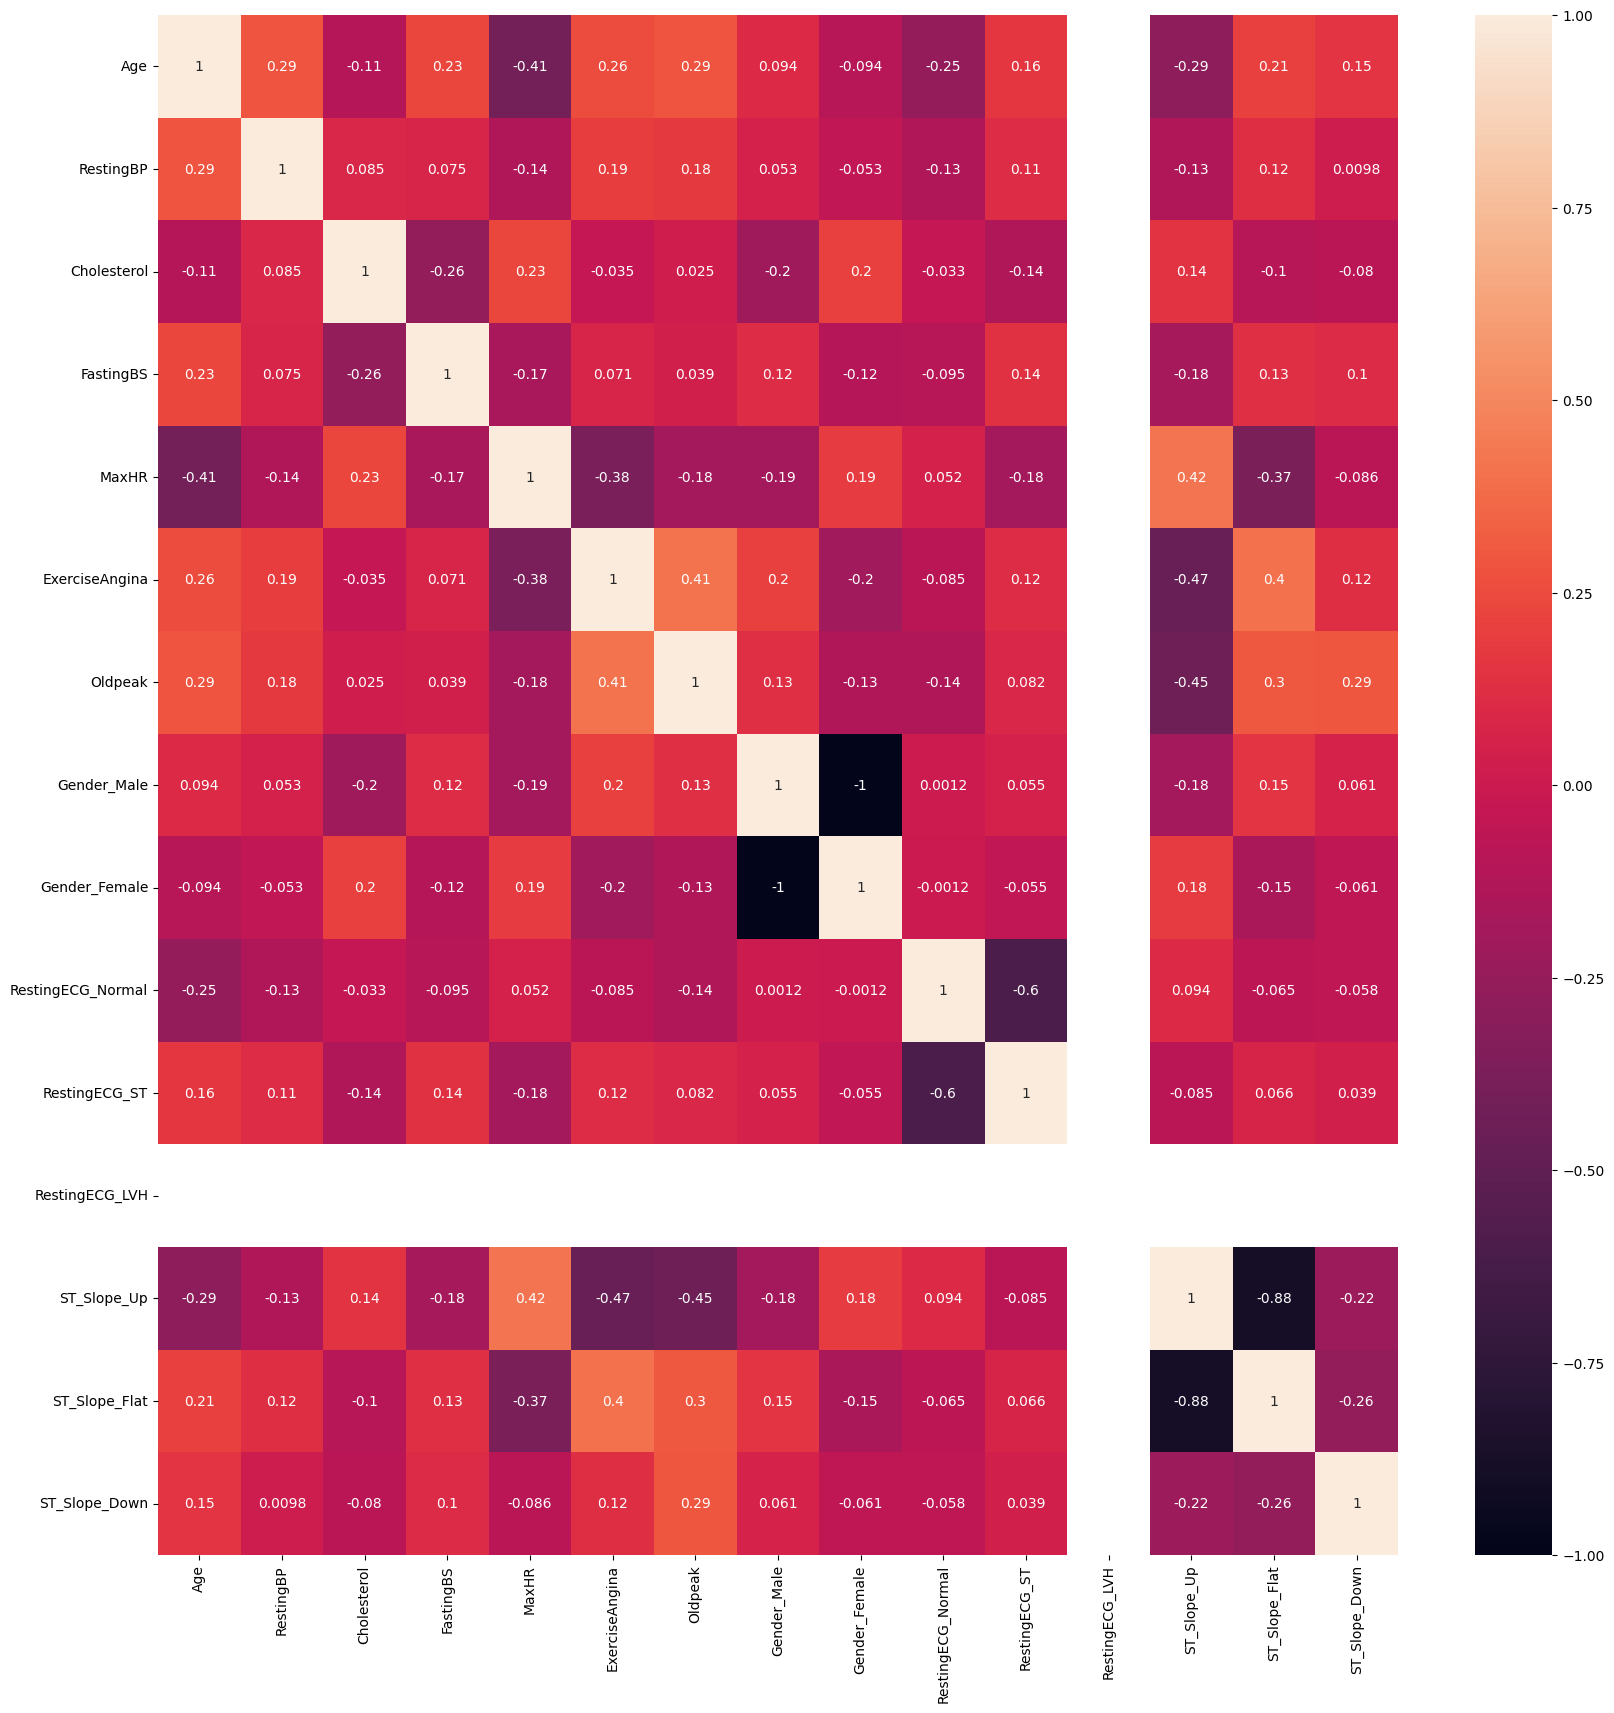

In [45]:
plt.figure(figsize=(20,20))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

###

## Feature Scaling Or Standardization

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [47]:
X_train_scaled

array([[ 0.46471433, -1.77231378,  0.2949892 , ...,  1.15890711,
        -1.02524056, -0.25431598],
       [ 0.78176703, -1.23486848, -1.90539005, ..., -0.86288193,
        -1.02524056,  3.93211628],
       [-0.06370685,  1.45235803, -1.90539005, ..., -0.86288193,
         0.97538084, -0.25431598],
       ...,
       [ 0.6760828 , -0.15997788,  0.47365248, ...,  1.15890711,
        -1.02524056, -0.25431598],
       [ 0.6760828 ,  1.02240179, -1.90539005, ...,  1.15890711,
        -1.02524056, -0.25431598],
       [-1.43760192,  0.91491273,  1.78071537, ..., -0.86288193,
         0.97538084, -0.25431598]])

- ### Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

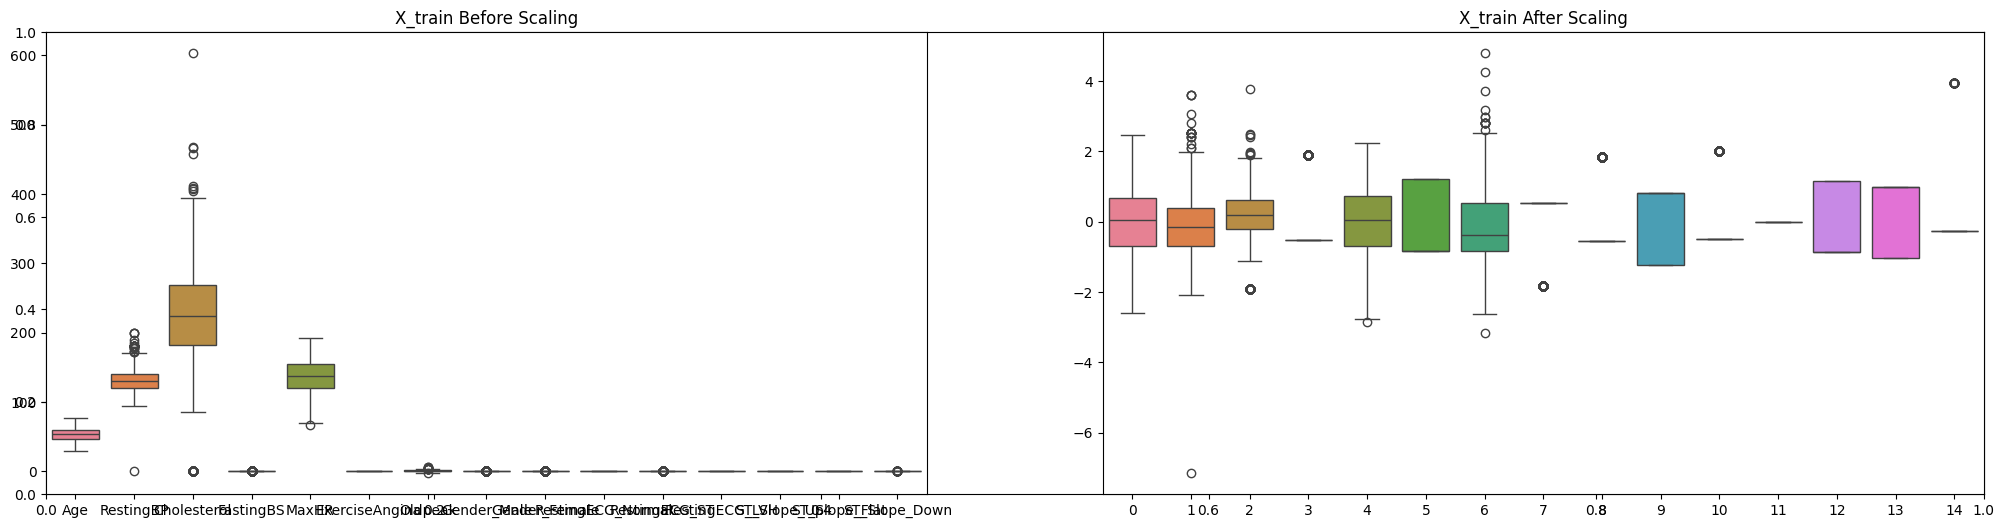

In [48]:
plt.subplots(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

###

## Creating ML Model using SVM

In [49]:
from sklearn.svm import SVC

# Initializing the Random Forest Regressor
model = SVC()

# Training the model on the training set
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test_scaled)

## Evaluating the model

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8768115942028986
Precision: 0.9012345679012346
Recall: 0.8902439024390244
F1 Score: 0.8957055214723927
